CLassic features, all models, 1 train, 1 test

In [ ]:
file_paths = {
    'Naive Bayes': ('../NaiveBayes/results_nb_four_factors.csv', '../NaiveBayes/results_nb_four_factors_train2.csv'),
    'KNN': ('../kNN/results_knn_four_factors.csv', '../kNN/results_knn_classic_four_factors_train2.csv'),
    'Random Forest': ('../RandomForest/results_rf_four_factors_v2.csv', '../RandomForest/results_rf_four_factors_train2.csv'),
    'SVM': ('../SVM/results_svm_four_factors.csv', '../SVM/results_svm_four_factors_train2.csv'),
    'XGBoost': ('../XGBoost/results_xgb2_four_factorsr.csv', '../XGBoost/results_xgb_four_factors_train2.csv'),
    'Neural Networks': ('../NeuralNetworks/results_nn_four_factors.csv', '../NeuralNetworks/results_nn_classification_four_factors_train2.csv')
}

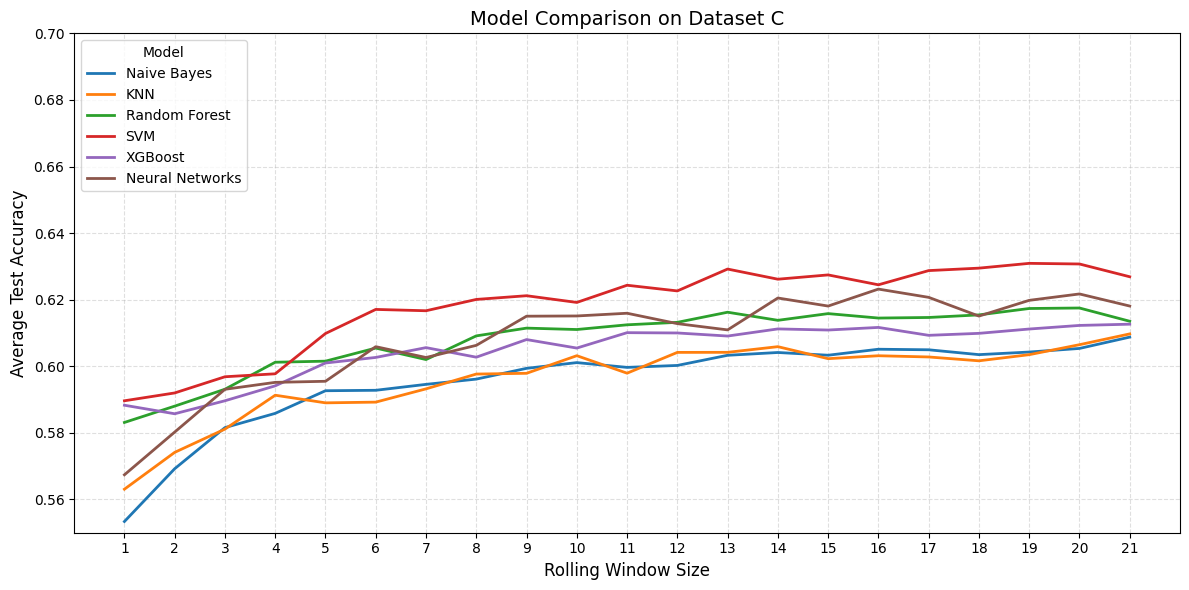


Best Accuracy and Rolling Window: 1-Season vs 2-Season Training (Dataset C):
          Model  1-Season Window  1-Season Accuracy  2-Season Window  2-Season Accuracy
            SVM               19             0.6309               20             0.6372
Neural Networks               16             0.6232               21             0.6327
  Random Forest               20             0.6175               19             0.6250
        XGBoost               21             0.6126               20             0.6276
            KNN               21             0.6097               21             0.6115
    Naive Bayes               21             0.6088               21             0.6137


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = {
    'Naive Bayes': ('../NaiveBayes/results_nb_classic_plus_four.csv', '../NaiveBayes/results_nb_classic_plus_four_train2.csv'),
    'KNN': ('../kNN/results_knn_classic_plus_four.csv', '../kNN/results_knn_classic_plus_four_train2.csv'),
    'Random Forest': ('../RandomForest/results_rf_classic_plus_four_v2.csv', '../RandomForest/results_rf_classic_plus_four_train2.csv'),
    'SVM': ('../SVM/results_svm_classic_plus_four.csv', '../SVM/results_svm_classic_plus_four_train2.csv'),
    'XGBoost': ('../XGBoost/results_xgb2_classic_plus_four.csv', '../XGBoost/results_xgb_classic_plus_four_train2.csv'),
    'Neural Networks': ('../NeuralNetworks/results_nn_classic_plus_four.csv', '../NeuralNetworks/results_nn_classification_classic_plus_four_train2.csv')
}

all_avg_dfs = []
best_results_comparison = []  

for model_name, (path_1season, path_2season) in file_paths.items():
    df1 = pd.read_csv(path_1season)
    metric_col = 'test_accuracy' if 'test_accuracy' in df1.columns else 'accuracy'
    avg_df1 = df1.groupby('rolling_window')[metric_col].mean().reset_index()
    avg_df1['model'] = model_name
    avg_df1.rename(columns={metric_col: 'avg_accuracy'}, inplace=True)
    all_avg_dfs.append(avg_df1)
    
    best_row_1season = avg_df1.loc[avg_df1['avg_accuracy'].idxmax()]
    
    df2 = pd.read_csv(path_2season)
    metric_col2 = 'test_accuracy' if 'test_accuracy' in df2.columns else 'accuracy'
    avg_df2 = df2.groupby('rolling_window')[metric_col2].mean().reset_index()
    best_row_2season = avg_df2.loc[avg_df2[metric_col2].idxmax()]
    
    best_results_comparison.append({
        'Model': model_name,
        '1-Season Window': int(best_row_1season['rolling_window']),
        '1-Season Accuracy': round(best_row_1season['avg_accuracy'], 4),
        '2-Season Window': int(best_row_2season['rolling_window']),
        '2-Season Accuracy': round(best_row_2season[metric_col2], 4)
    })

combined_df = pd.concat(all_avg_dfs, ignore_index=True)

fig, ax = plt.subplots(figsize=(12, 6))
for model in [name for name, _ in file_paths.items()]:
    model_data = combined_df[combined_df['model'] == model]
    ax.plot(model_data['rolling_window'], model_data['avg_accuracy'],
            label=model, linewidth=2)

ax.set_title('Model Comparison on Dataset C', fontsize=14)
ax.set_xlabel('Rolling Window Size', fontsize=12)
ax.set_ylabel('Average Test Accuracy', fontsize=12)
ax.set_xticks(range(1, 22))
ax.set_ylim(0.55, 0.70)
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(title='Model', loc='upper left', frameon=True, fontsize=10, title_fontsize=10)
plt.tight_layout()
plt.show()

comparison_df = pd.DataFrame(best_results_comparison)
comparison_df = comparison_df.sort_values(by='1-Season Accuracy', ascending=False).reset_index(drop=True)

print("\nBest Accuracy and Rolling Window: 1-Season vs 2-Season Training (Dataset C):")
print(comparison_df.to_string(index=False))

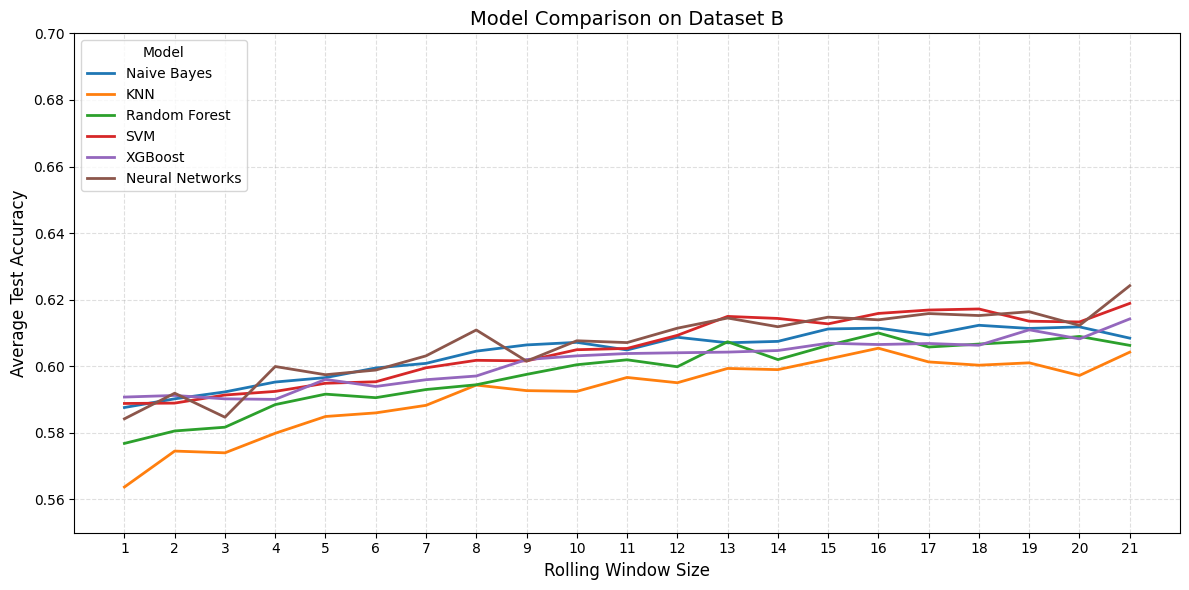


Best Accuracy and Rolling Window: 1-Season vs 2-Season Training (Dataset B):
          Model  1-Season Window  1-Season Accuracy  2-Season Window  2-Season Accuracy
Neural Networks               21             0.6242               21             0.6300
            SVM               21             0.6189               21             0.6293
        XGBoost               21             0.6142               21             0.6223
    Naive Bayes               18             0.6123               19             0.6214
  Random Forest               16             0.6100               19             0.6194
            KNN               16             0.6054               21             0.6118


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = {
    'Naive Bayes': ('../NaiveBayes/results_nb_four_factors.csv', '../NaiveBayes/results_nb_four_factors_train2.csv'),
    'KNN': ('../kNN/results_knn_four_factors.csv', '../kNN/results_knn_four_factors_train2.csv'),
    'Random Forest': ('../RandomForest/results_rf_four_factors_v2.csv', '../RandomForest/results_rf_four_factors_train2.csv'),
    'SVM': ('../SVM/results_svm_four_factors.csv', '../SVM/results_svm_four_factors_train2.csv'),
    'XGBoost': ('../XGBoost/results_xgb2_four_factors.csv', '../XGBoost/results_xgb_four factors_train2.csv'),
    'Neural Networks': ('../NeuralNetworks/results_nn_four_factors.csv', '../NeuralNetworks/results_nn_classification_four_factors_train2.csv')
}

all_avg_dfs = []
best_results_comparison = []  

for model_name, (path_1season, path_2season) in file_paths.items():
    df1 = pd.read_csv(path_1season)
    metric_col = 'test_accuracy' if 'test_accuracy' in df1.columns else 'accuracy'
    avg_df1 = df1.groupby('rolling_window')[metric_col].mean().reset_index()
    avg_df1['model'] = model_name
    avg_df1.rename(columns={metric_col: 'avg_accuracy'}, inplace=True)
    all_avg_dfs.append(avg_df1)
    best_row_1season = avg_df1.loc[avg_df1['avg_accuracy'].idxmax()]
    
    df2 = pd.read_csv(path_2season)
    metric_col2 = 'test_accuracy' if 'test_accuracy' in df2.columns else 'accuracy'
    avg_df2 = df2.groupby('rolling_window')[metric_col2].mean().reset_index()

    best_row_2season = avg_df2.loc[avg_df2[metric_col2].idxmax()]
    
    best_results_comparison.append({
        'Model': model_name,
        '1-Season Window': int(best_row_1season['rolling_window']),
        '1-Season Accuracy': round(best_row_1season['avg_accuracy'], 4),
        '2-Season Window': int(best_row_2season['rolling_window']),
        '2-Season Accuracy': round(best_row_2season[metric_col2], 4)
    })


combined_df = pd.concat(all_avg_dfs, ignore_index=True)

fig, ax = plt.subplots(figsize=(12, 6))
for model in [name for name, _ in file_paths.items()]:
    model_data = combined_df[combined_df['model'] == model]
    ax.plot(model_data['rolling_window'], model_data['avg_accuracy'],
            label=model, linewidth=2)

ax.set_title('Model Comparison on Dataset B', fontsize=14)
ax.set_xlabel('Rolling Window Size', fontsize=12)
ax.set_ylabel('Average Test Accuracy', fontsize=12)
ax.set_xticks(range(1, 22))
ax.set_ylim(0.55, 0.70)
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(title='Model', loc='upper left', frameon=True, fontsize=10, title_fontsize=10)
plt.tight_layout()
plt.show()

comparison_df = pd.DataFrame(best_results_comparison)
comparison_df = comparison_df.sort_values(by='1-Season Accuracy', ascending=False).reset_index(drop=True)

print("\nBest Accuracy and Rolling Window: 1-Season vs 2-Season Training (Dataset B):")
print(comparison_df.to_string(index=False))

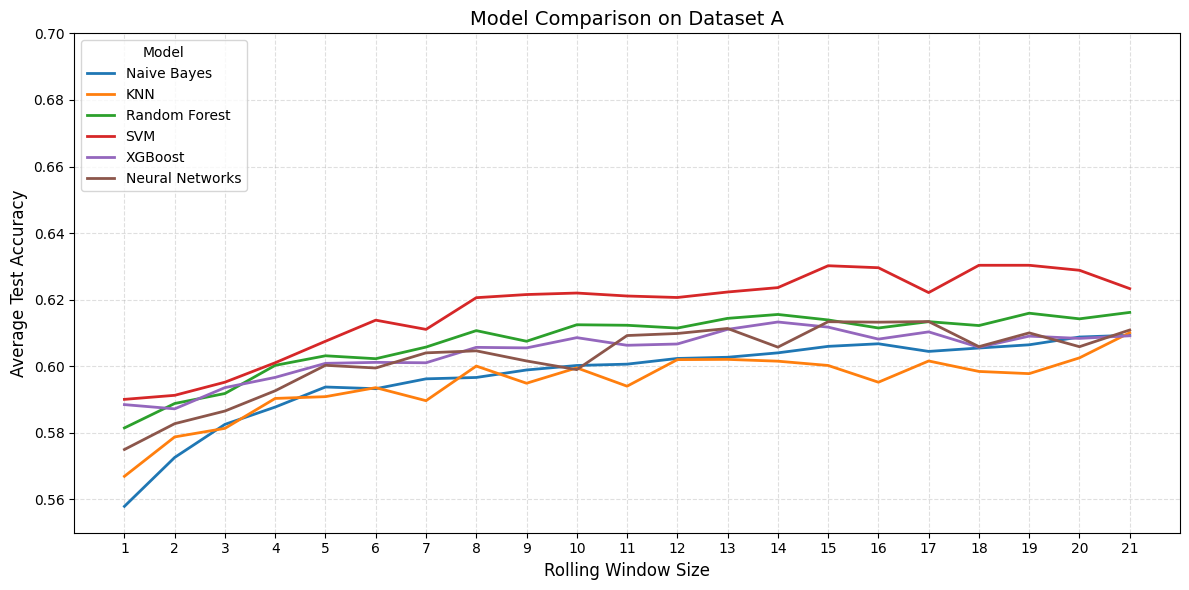


Best Accuracy and Rolling Window: 1-Season vs 2-Season Training (Dataset A):
          Model  1-Season Window  1-Season Accuracy  2-Season Window  2-Season Accuracy
            SVM               19             0.6303               21             0.6389
  Random Forest               21             0.6162               21             0.6235
Neural Networks               17             0.6134               20             0.6290
        XGBoost               14             0.6133               21             0.6269
            KNN               21             0.6101               21             0.6120
    Naive Bayes               21             0.6093               21             0.6144


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = {
    'Naive Bayes': ('../NaiveBayes/results_nb_classic.csv', '../NaiveBayes/results_nb_classic_train2.csv'),
    'KNN': ('../kNN/results_knn_classic.csv', '../kNN/results_knn_classic_train2.csv'),
    'Random Forest': ('../RandomForest/results_rf_classic_v2.csv', '../RandomForest/results_rf_classic_train2.csv'),
    'SVM': ('../SVM/results_svm_classic.csv', '../SVM/results_svm_classic_train2.csv'),
    'XGBoost': ('../XGBoost/results_xgb2_classic.csv', '../XGBoost/results_xgb_classic_train2.csv'),
    'Neural Networks': ('../NeuralNetworks/results_nn_classic.csv', '../NeuralNetworks/results_nn_classification_classic_train2.csv')
}

all_avg_dfs = []
best_results_comparison = []  

for model_name, (path_1season, path_2season) in file_paths.items():
    df1 = pd.read_csv(path_1season)
    metric_col = 'test_accuracy' if 'test_accuracy' in df1.columns else 'accuracy'
    avg_df1 = df1.groupby('rolling_window')[metric_col].mean().reset_index()
    avg_df1['model'] = model_name
    avg_df1.rename(columns={metric_col: 'avg_accuracy'}, inplace=True)
    all_avg_dfs.append(avg_df1)
    
    best_row_1season = avg_df1.loc[avg_df1['avg_accuracy'].idxmax()]
    
    df2 = pd.read_csv(path_2season)
    metric_col2 = 'test_accuracy' if 'test_accuracy' in df2.columns else 'accuracy'
    avg_df2 = df2.groupby('rolling_window')[metric_col2].mean().reset_index()
    
    best_row_2season = avg_df2.loc[avg_df2[metric_col2].idxmax()]
    
    best_results_comparison.append({
        'Model': model_name,
        '1-Season Window': int(best_row_1season['rolling_window']),
        '1-Season Accuracy': round(best_row_1season['avg_accuracy'], 4),
        '2-Season Window': int(best_row_2season['rolling_window']),
        '2-Season Accuracy': round(best_row_2season[metric_col2], 4)
    })

combined_df = pd.concat(all_avg_dfs, ignore_index=True)

fig, ax = plt.subplots(figsize=(12, 6))
for model in [name for name, _ in file_paths.items()]:
    model_data = combined_df[combined_df['model'] == model]
    ax.plot(model_data['rolling_window'], model_data['avg_accuracy'],
            label=model, linewidth=2)

ax.set_title('Model Comparison on Dataset A', fontsize=14)
ax.set_xlabel('Rolling Window Size', fontsize=12)
ax.set_ylabel('Average Test Accuracy', fontsize=12)
ax.set_xticks(range(1, 22))
ax.set_ylim(0.55, 0.70)
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(title='Model', loc='upper left', frameon=True, fontsize=10, title_fontsize=10)
plt.tight_layout()
plt.show()

comparison_df = pd.DataFrame(best_results_comparison)
comparison_df = comparison_df.sort_values(by='1-Season Accuracy', ascending=False).reset_index(drop=True)

print("\nBest Accuracy and Rolling Window: 1-Season vs 2-Season Training (Dataset A):")
print(comparison_df.to_string(index=False))

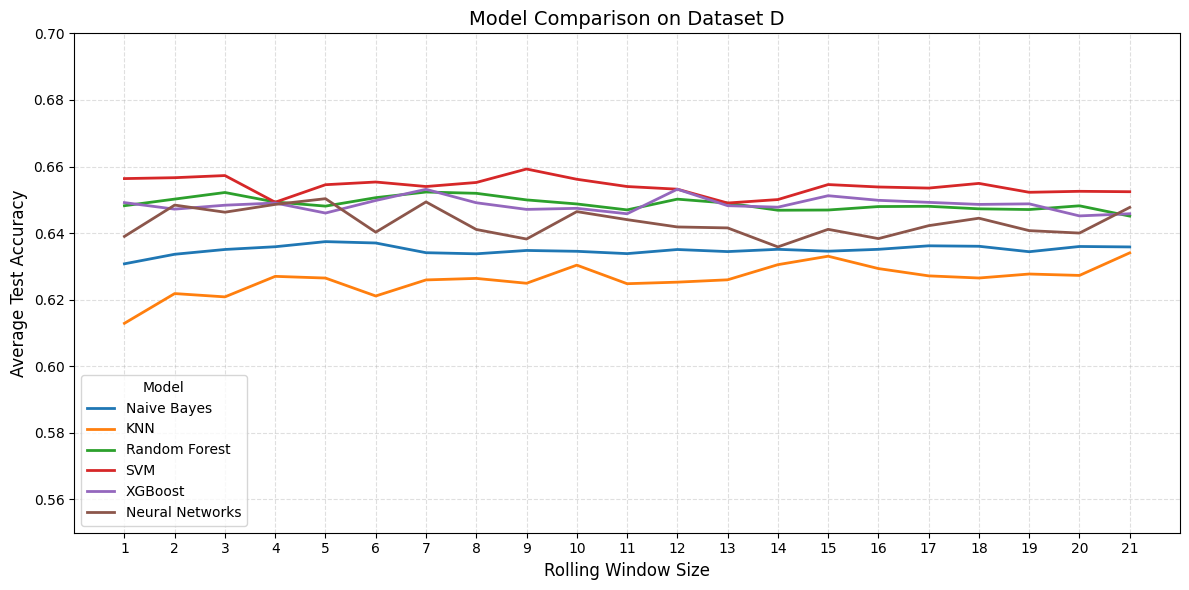


Best Accuracy and Rolling Window: 1-Season vs 2-Season Training (Dataset D):
          Model  1-Season Window  1-Season Accuracy  2-Season Window  2-Season Accuracy
            SVM                9             0.6592               19             0.6639
        XGBoost               12             0.6532               14             0.6642
  Random Forest                7             0.6523                7             0.6600
Neural Networks                5             0.6503                8             0.6592
    Naive Bayes                5             0.6374               15             0.6425
            KNN               21             0.6341               21             0.6386


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = {
    'Naive Bayes': ('../NaiveBayes/results_nb_reduced.csv', '../NaiveBayes/results_nb_reduced_train2.csv'),
    'KNN': ('../kNN/results_knn_reduced.csv', '../kNN/results_knn_reduced_train2.csv'),
    'Random Forest': ('../RandomForest/results_rf_reduced_v2.csv', '../RandomForest/results_rf_reduced_train2.csv'),
    'SVM': ('../SVM/results_svm_reduced.csv', '../SVM/results_svm_reduced_train2.csv'),
    'XGBoost': ('../XGBoost/results_xgb2_reduced.csv', '../XGBoost/results_xgb_reduced_train2.csv'),
    'Neural Networks': ('../NeuralNetworks/results_nn_reduced.csv', '../NeuralNetworks/results_nn_classification_reduced_train2.csv')
}

all_avg_dfs = []
best_results_comparison = []  

for model_name, (path_1season, path_2season) in file_paths.items():
    df1 = pd.read_csv(path_1season)
    metric_col = 'test_accuracy' if 'test_accuracy' in df1.columns else 'accuracy'
    avg_df1 = df1.groupby('rolling_window')[metric_col].mean().reset_index()
    avg_df1['model'] = model_name
    avg_df1.rename(columns={metric_col: 'avg_accuracy'}, inplace=True)
    all_avg_dfs.append(avg_df1)
    
    best_row_1season = avg_df1.loc[avg_df1['avg_accuracy'].idxmax()]
    
    df2 = pd.read_csv(path_2season)
    metric_col2 = 'test_accuracy' if 'test_accuracy' in df2.columns else 'accuracy'
    avg_df2 = df2.groupby('rolling_window')[metric_col2].mean().reset_index()
    
    best_row_2season = avg_df2.loc[avg_df2[metric_col2].idxmax()]
    
    best_results_comparison.append({
        'Model': model_name,
        '1-Season Window': int(best_row_1season['rolling_window']),
        '1-Season Accuracy': round(best_row_1season['avg_accuracy'], 4),
        '2-Season Window': int(best_row_2season['rolling_window']),
        '2-Season Accuracy': round(best_row_2season[metric_col2], 4)
    })

combined_df = pd.concat(all_avg_dfs, ignore_index=True)

fig, ax = plt.subplots(figsize=(12, 6))
for model in [name for name, _ in file_paths.items()]:
    model_data = combined_df[combined_df['model'] == model]
    ax.plot(model_data['rolling_window'], model_data['avg_accuracy'],
            label=model, linewidth=2)

ax.set_title('Model Comparison on Dataset D', fontsize=14)
ax.set_xlabel('Rolling Window Size', fontsize=12)
ax.set_ylabel('Average Test Accuracy', fontsize=12)
ax.set_xticks(range(1, 22))
ax.set_ylim(0.55, 0.70)
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(title='Model', loc='best', frameon=True, fontsize=10, title_fontsize=10)
plt.tight_layout()
plt.show()

comparison_df = pd.DataFrame(best_results_comparison)
comparison_df = comparison_df.sort_values(by='1-Season Accuracy', ascending=False).reset_index(drop=True)

print("\nBest Accuracy and Rolling Window: 1-Season vs 2-Season Training (Dataset D):")
print(comparison_df.to_string(index=False))

file_paths = {
    'Naive Bayes': ('../NaiveBayes/results_nb_classic.csv', '../NaiveBayes/results_nb_classic_train2.csv'),
    'KNN': ('../kNN/results_knn_classic.csv', '../kNN/results_knn_classic_train2.csv'),
    'Random Forest': ('../RandomForest/results_rf_classic_v2.csv', '../RandomForest/results_rf_classic_train2.csv'),
    'SVM': ('../SVM/results_svm_classic.csv', '../SVM/results_svm_classic.csv'),
    'XGBoost': ('../XGBoost/results_xgb2_classic.csv', '../XGBoost/results_xgb_classic_train2.csv'),
    'Neural Networks': ('../NeuralNetworks/results_nn_classic.csv', '../NeuralNetworks/results_nn_classification_classic_train2.csv')
}

In [ ]:
file_paths = {
    'Naive Bayes': ('../NaiveBayes/results_nb_classic_plus_four.csv', '../NaiveBayes/results_nb_classic_plus_four_train2.csv'),
    'KNN': ('../kNN/results_knn_classic_plus_four.csv', '../kNN/results_knn_classic_plus_four_train2.csv'),
    'Random Forest': ('../RandomForest/results_rf_classic_plus_four_v2.csv', '../RandomForest/results_rf_classic_plus_four_train2.csv'),
    'SVM': ('../SVM/results_svm_classic_plus_four.csv', '../SVM/results_svm_classic_plus_four_train2.csv'),
    'XGBoost': ('../XGBoost/results_xgb2_classic_plus_four.csv', '../XGBoost/results_xgb_classic_plus_four_train2.csv'),
    'Neural Networks': ('../NeuralNetworks/results_nn_classic_plus_four.csv', '../NeuralNetworks/results_nn_classification_classic_plus_four_train2.csv')
}

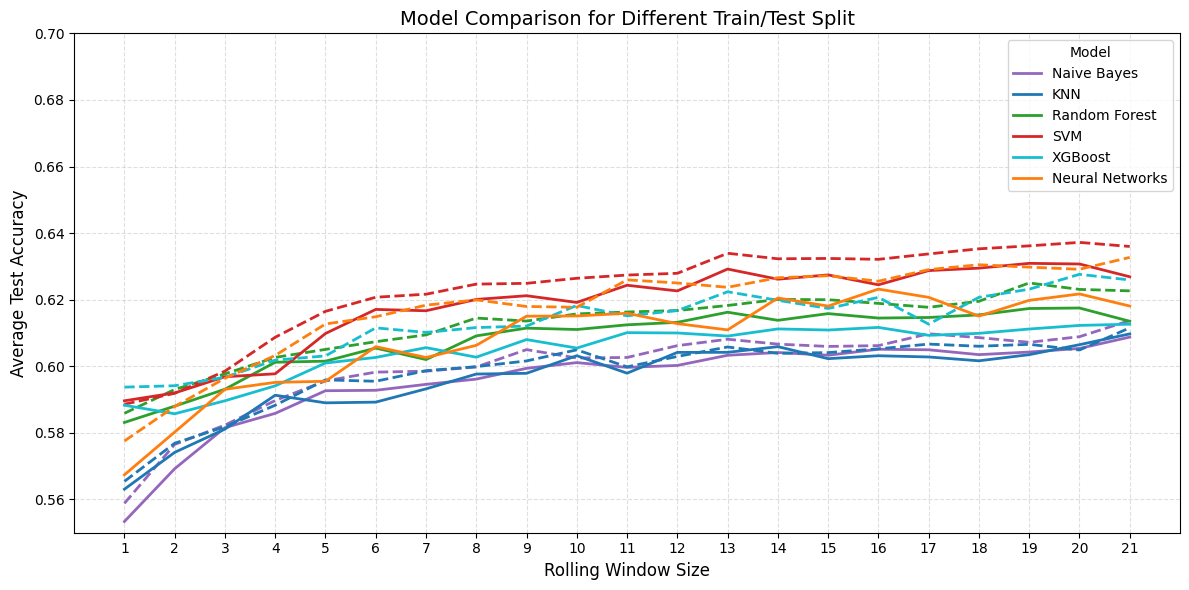

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = {
    'Naive Bayes': ('../NaiveBayes/results_nb_classic_plus_four.csv', '../NaiveBayes/results_nb_classic_plus_four_train2.csv'),
    'KNN': ('../kNN/results_knn_classic_plus_four.csv', '../kNN/results_knn_classic_plus_four_train2.csv'),
    'Random Forest': ('../RandomForest/results_rf_classic_plus_four_v2.csv', '../RandomForest/results_rf_classic_plus_four_train2.csv'),
    'SVM': ('../SVM/results_svm_classic_plus_four.csv', '../SVM/results_svm_classic_plus_four_train2.csv'),
    'XGBoost': ('../XGBoost/results_xgb2_classic_plus_four.csv', '../XGBoost/results_xgb_classic_plus_four_train2.csv'),
    'Neural Networks': ('../NeuralNetworks/results_nn_classic_plus_four.csv', '../NeuralNetworks/results_nn_classification_classic_plus_four_train2.csv')
}

colors = {
    'Naive Bayes': 'tab:purple',
    'KNN': 'tab:blue',
    'Random Forest': 'tab:green',
    'SVM': 'tab:red',
    'XGBoost': 'tab:cyan',
    'Neural Networks': 'tab:orange'
}

fig, ax = plt.subplots(figsize=(12, 6))

for model, (path1, path2) in file_paths.items():
    df1 = pd.read_csv(path1)
    metric_col1 = 'test_accuracy' if 'test_accuracy' in df1.columns else 'accuracy'
    avg_df1 = df1.groupby('rolling_window')[metric_col1].mean().reset_index()
    ax.plot(avg_df1['rolling_window'], avg_df1[metric_col1],
            label=model,
            color=colors[model],
            linestyle='-',
            linewidth=2)

    df2 = pd.read_csv(path2)
    metric_col2 = 'test_accuracy' if 'test_accuracy' in df2.columns else 'accuracy'
    avg_df2 = df2.groupby('rolling_window')[metric_col2].mean().reset_index()
    ax.plot(avg_df2['rolling_window'], avg_df2[metric_col2],
            color=colors[model],
            linestyle='--',
            linewidth=2)

ax.set_title('Model Comparison for Different Train/Test Split', fontsize=14)
ax.set_xlabel('Rolling Window Size', fontsize=12)
ax.set_ylabel('Average Test Accuracy', fontsize=12)
ax.set_xticks(range(1, 22))
ax.set_ylim(0.55, 0.70)
ax.grid(True, linestyle='--', alpha=0.4)

ax.legend(title='Model', loc='best', frameon=True, fontsize=10, title_fontsize=10)

plt.tight_layout()
plt.show()


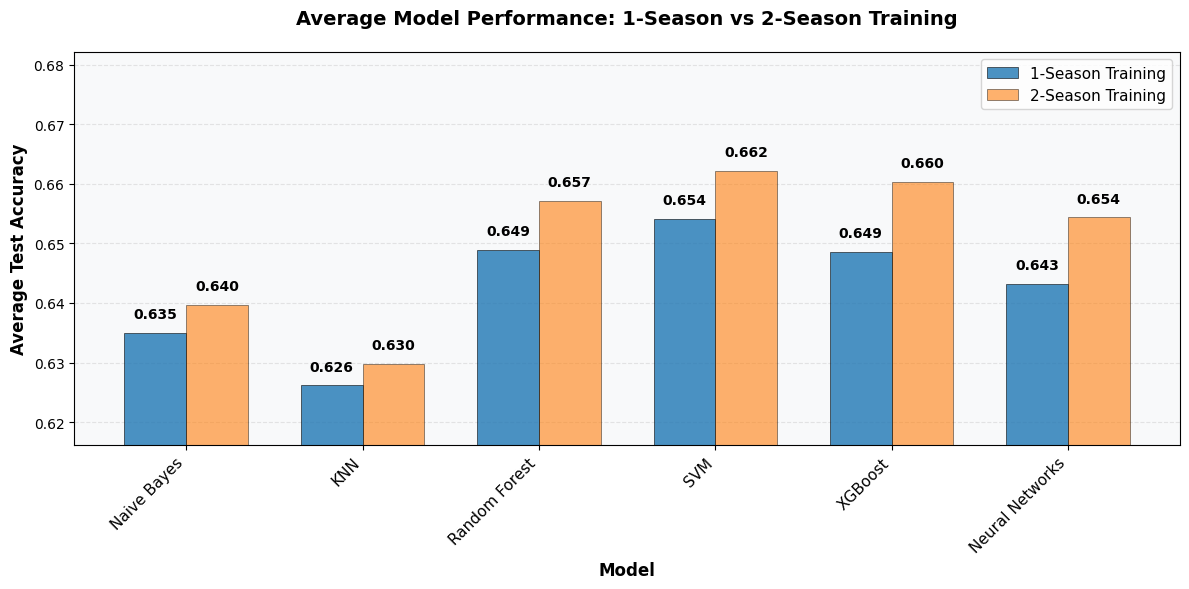

SUMMARY STATISTICS
Model           1-Season   2-Season   Difference
------------------------------------------------------------
Naive Bayes     0.635     0.640     -0.005
KNN             0.626     0.630     -0.004
Random Forest   0.649     0.657     -0.008
SVM             0.654     0.662     -0.008
XGBoost         0.649     0.660     -0.012
Neural Networks 0.643     0.654     -0.011
------------------------------------------------------------
Average performance loss with 2-season training: -0.008
→ 2-Season training performs better on average


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_paths = {
    'Naive Bayes': ('../NaiveBayes/results_nb_reduced.csv', '../NaiveBayes/results_nb_reduced_train2.csv'),
    'KNN': ('../kNN/results_knn_reduced.csv', '../kNN/results_knn_reduced_train2.csv'),
    'Random Forest': ('../RandomForest/results_rf_reduced_v2.csv', '../RandomForest/results_rf_reduced_train2.csv'),
    'SVM': ('../SVM/results_svm_reduced.csv', '../SVM/results_svm_reduced_train2.csv'),
    'XGBoost': ('../XGBoost/results_xgb2_reduced.csv', '../XGBoost/results_xgb_reduced_train2.csv'),
    'Neural Networks': ('../NeuralNetworks/results_nn_reduced.csv', '../NeuralNetworks/results_nn_classification_reduced_train2.csv')
}

color_1season = '#1f77b4' 
color_2season = '#ff7f0e'  

model_averages = {}

for model, (path1, path2) in file_paths.items():
    
    df1 = pd.read_csv(path1)
    metric_col1 = 'test_accuracy' if 'test_accuracy' in df1.columns else 'accuracy'
    avg_1season = df1[metric_col1].mean()  
    
    df2 = pd.read_csv(path2)
    metric_col2 = 'test_accuracy' if 'test_accuracy' in df2.columns else 'accuracy'
    avg_2season = df2[metric_col2].mean()  # Average across ALL experiments
    
    model_averages[model] = {
        '1-Season': avg_1season,
        '2-Season': avg_2season
    }

models = list(model_averages.keys())
avg_1season = [model_averages[model]['1-Season'] for model in models]
avg_2season = [model_averages[model]['2-Season'] for model in models]


colors_1season = [color_1season] * len(models) 
colors_2season = [color_2season] * len(models)  

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, avg_1season, width, label='1-Season Training', 
               color=colors_1season, alpha=0.8, edgecolor='black', linewidth=0.5)
bars2 = ax.bar(x + width/2, avg_2season, width, label='2-Season Training', 
               color=colors_2season, alpha=0.6, edgecolor='black', linewidth=0.5)

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    ax.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 0.002, 
            f'{avg_1season[i]:.3f}', ha='center', va='bottom', 
            fontsize=10, fontweight='bold')
    

    ax.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 0.002, 
            f'{avg_2season[i]:.3f}', ha='center', va='bottom', 
            fontsize=10, fontweight='bold')
   
    diff = avg_1season[i] - avg_2season[i]
    if diff > 0:  
        ax.annotate(f'Δ{diff:.3f}', 
                   xy=(x[i], max(avg_1season[i], avg_2season[i]) + 0.008),
                   ha='center', va='bottom', fontsize=9, 
                   color='red', fontweight='bold')

ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Test Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Average Model Performance: 1-Season vs 2-Season Training', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=11)
ax.legend(fontsize=11, loc='upper right')

ax.grid(True, alpha=0.3, axis='y', linestyle='--')
ax.set_axisbelow(True)

y_min = min(min(avg_1season), min(avg_2season)) - 0.01
y_max = max(max(avg_1season), max(avg_2season)) + 0.02
ax.set_ylim(y_min, y_max)

ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

print("SUMMARY STATISTICS")
print("=" * 60)
print(f"{'Model':<15} {'1-Season':<10} {'2-Season':<10} {'Difference':<10}")
print("-" * 60)

total_diff = 0
for model in models:
    diff = model_averages[model]['1-Season'] - model_averages[model]['2-Season']
    total_diff += diff
    print(f"{model:<15} {model_averages[model]['1-Season']:.3f}     "
          f"{model_averages[model]['2-Season']:.3f}     {diff:+.3f}")

print("-" * 60)
print(f"Average performance loss with 2-season training: {total_diff/len(models):+.3f}")

if total_diff > 0:
    print("→ 1-Season training performs better on average")
else:
    print("→ 2-Season training performs better on average")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = {
    'Naive Bayes': ('../NaiveBayes/results_nb_reduced.csv', '../NaiveBayes/results_nb_train2.csv'),
    'KNN': ('../kNN/results_knn_reduced.csv', '../kNN/results_knn_reduced_train2.csv'),
    'Random Forest': ('../RandomForest/results_rf_reduced_v2.csv', '../RandomForest/results_rf_reduced_train2.csv'),
    'SVM': ('../SVM/results_svm_reduced.csv', '../SVM/results_svm_reduced_train2.csv'),
    'XGBoost': ('../XGBoost/results_xgb2_reduced.csv', '../XGBoost/results_xgb_reduced_train2.csv'),
    'Neural Networks': ('../NeuralNetworks/results_nn_reduced.csv', '../NeuralNetworks/results_nn_reduced_train2.csv')
}

fig, ax = plt.subplots(figsize=(12, 6))

for model, (path1, path2) in file_paths.items():
    df1 = pd.read_csv(path1)
    metric_col1 = 'test_accuracy' if 'test_accuracy' in df1.columns else 'accuracy'
    avg_df1 = df1.groupby('rolling_window')[metric_col1].mean().reset_index()
    line1, = ax.plot(avg_df1['rolling_window'], avg_df1[metric_col1],
                     label=model,
                     linestyle='-',
                     linewidth=2)

    df2 = pd.read_csv(path2)
    metric_col2 = 'test_accuracy' if 'test_accuracy' in df2.columns else 'accuracy'
    avg_df2 = df2.groupby('rolling_window')[metric_col2].mean().reset_index()
    ax.plot(avg_df2['rolling_window'], avg_df2[metric_col2],
            linestyle='--',
            linewidth=2,
            color=line1.get_color())

ax.set_title('Model Comparison for Different Train/Test Split', fontsize=14)
ax.set_xlabel('Rolling Window Size', fontsize=12)
ax.set_ylabel('Average Test Accuracy', fontsize=12)
ax.set_xticks(range(1, 22))
ax.set_ylim(0.55, 0.70)
ax.grid(True, linestyle='--', alpha=0.4)

ax.legend(title='Model', loc='best', frameon=True, fontsize=10, title_fontsize=10)

plt.tight_layout()
plt.show()
